### Castlecraig

In [1]:
import ipywidgets as widgets
import pandas as pd
import sys
path = r'C:\BW\RTD\repos-hadley\brightwind\brightwind'
if path not in sys.path:
    sys.path.insert(1, path)
from analyse import correlation as bw
from load import reanalysis
from plot import plot
from transform import transform
from analyse import analyse

import importlib
importlib.reload(bw)
importlib.reload(reanalysis)
importlib.reload(plot)
importlib.reload(transform)
importlib.reload(analyse)


<module 'analyse.analyse' from 'C:\\BW\\RTD\\repos-hadley\\brightwind\\brightwind\\analyse\\analyse.py'>

In [147]:
analyse.get_concurrent_coverage(merra2_dfs[0].data[ref_merra2_wdgt.value], site_data[target_wdgt.value], averaging_prd='1M')

,WS50m_ms,A_Avg1,Coverage
2011-01-01,7.441685,6.271714,0.375000
2011-02-01,11.409894,8.261815,1.000000
2011-03-01,9.085711,6.237083,1.000000
2011-04-01,8.812686,7.001463,1.000000
2011-05-01,12.570698,10.643631,1.000000
2011-06-01,7.523724,6.381873,1.000000
2011-07-01,6.140862,5.910354,1.000000
2011-08-01,6.721813,5.820753,1.000000
2011-09-01,11.974203,9.641574,1.000000
2011-10-01,11.897019,8.988519,1.000000


In [123]:
svr = bw.SVR(merra2_dfs[0].data[ref_merra2_wdgt.value], site_data[target_wdgt.value], averaging_prd='1M', coverage_threshold=0.8)

In [124]:
svr.run()

In [125]:
svr.show_params()

{'RMSE': array([ 0.24164917,  0.14875447,  0.11676071]), 'MAE': array([ 0.33747064,  0.29556779,  0.27559447]), 'Explained Variance': array([-0.90633646, -0.90065844, -0.94794516])}


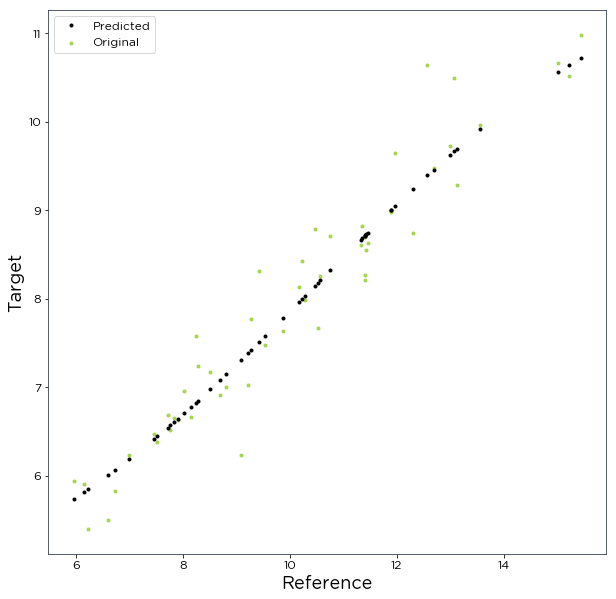

In [126]:
svr.plot()

In [66]:
merra2_dfs_1996 = reanalysis.get_merra2_nearest_nodes('55.5','-8.5', from_date='1996-01-01', to_date='2016-12-31')

2018-09-25 16:54:14.298690 - Run start for get_merra_2_dataframe.
2018-09-25 16:54:14.298690 - http://52.16.60.214:3306/merra/55.5/-8.75/1996-01-01/2016-12-31


KeyboardInterrupt: 

In [8]:
import pickle
with open ('merra2_dfs_castlecraig_1996.pkl','wb') as file:
    pickle.dump(merra2_dfs_1996,file)
    

In [75]:
merra2_dfs[0].data.to_csv('Castlecraig_MERRA2_correlations_test.csv')

In [2]:
import pickle
merra2_dfs = pickle.load(open('merra2_dfs_castlecraig_1996.pkl','rb'))

In [3]:
site_file_path = r'C:\Dropbox (brightwind)\RTD\BrightData\MERA\2018-05-25_MERA-LT-reference-quality\site-data\M352_Calib_Cleaned_20jan2011onwards.csv'

if site_file_path.endswith('.csv'):
    site_data = pd.read_csv(site_file_path)
else:
    site_data = pd.read_excel(site_file_path)
index_wdgt = widgets.Dropdown(
    options=site_data.columns,
    description='Index column:',style = {'description_width': 'initial'},
    disabled=False
)
print("Choose index column:")
index_wdgt




Choose index column:


A Jupyter Widget

In [4]:

site_data = site_data.set_index(pd.DatetimeIndex(site_data[index_wdgt.value]))


In [5]:
target_wdgt = widgets.Dropdown(options=site_data.columns, description='Target:', style = {'description_width': 'initial'},disabled=False)
ref_merra2_wdgt = widgets.Dropdown(options=merra2_dfs[0].data.columns, description='MERRA2:',style = {'description_width': 'initial'}, disabled=False)
items = [target_wdgt, ref_merra2_wdgt]
box_layout = widgets.Layout(display='flex', flex_flow='row', align_items='stretch')
box = widgets.Box(children=items, layout=box_layout)
box


A Jupyter Widget

In [14]:
merra2_dfs[1].data.resample('10D', axis=0, closed='left', label='left',base=0,
                                convention='start', kind='timestamp').count().divide(transform._max_coverage_count(merra2_dfs[1].data.index, merra2_dfs[1].data.resample('10D', axis=0, closed='left', label='left',base=0,
                                convention='start', kind='timestamp').mean().index), axis=0)

,PS_hPa,T2M_degC,WD50m_deg,WS50m_ms
DateTime,,,,
1996-01-01,1.0,1.0,1.0,1.0
1996-01-11,1.0,1.0,1.0,1.0
1996-01-21,1.0,1.0,1.0,1.0
1996-01-31,1.0,1.0,1.0,1.0
1996-02-10,1.0,1.0,1.0,1.0
1996-02-20,1.0,1.0,1.0,1.0
1996-03-01,1.0,1.0,1.0,1.0
1996-03-11,1.0,1.0,1.0,1.0
1996-03-21,1.0,1.0,1.0,1.0


In [71]:
transform._max_coverage_count(merra2_dfs[1].data.index, merra2_dfs[1].data.resample('10D', axis=0, closed='left', label='left',base=0,
                                convention='start', kind='timestamp').mean().index)

DateTime
1996-01-01    240.0
1996-01-11    240.0
1996-01-21    240.0
1996-01-31    240.0
1996-02-10    240.0
1996-02-20    240.0
1996-03-01    240.0
1996-03-11    240.0
1996-03-21    240.0
1996-03-31    240.0
1996-04-10    240.0
1996-04-20    240.0
1996-04-30    240.0
1996-05-10    240.0
1996-05-20    240.0
1996-05-30    240.0
1996-06-09    240.0
1996-06-19    240.0
1996-06-29    240.0
1996-07-09    240.0
1996-07-19    240.0
1996-07-29    240.0
1996-08-08    240.0
1996-08-18    240.0
1996-08-28    240.0
1996-09-07    240.0
1996-09-17    240.0
1996-09-27    240.0
1996-10-07    240.0
1996-10-17    240.0
              ...  
2016-03-06    240.0
2016-03-16    240.0
2016-03-26    240.0
2016-04-05    240.0
2016-04-15    240.0
2016-04-25    240.0
2016-05-05    240.0
2016-05-15    240.0
2016-05-25    240.0
2016-06-04    240.0
2016-06-14    240.0
2016-06-24    240.0
2016-07-04    240.0
2016-07-14    240.0
2016-07-24    240.0
2016-08-03    240.0
2016-08-13    240.0
2016-08-23    240.0
2016-09-02 

In [40]:
transform.get_coverage(merra2_dfs[1].data)

,1996-01-01 00:00:00,1996-02-01 00:00:00,1996-03-01 00:00:00,1996-04-01 00:00:00,1996-05-01 00:00:00,1996-06-01 00:00:00,1996-07-01 00:00:00,1996-08-01 00:00:00,1996-09-01 00:00:00,1996-10-01 00:00:00,...,2016-07-01 00:00:00,2016-08-01 00:00:00,2016-09-01 00:00:00,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,PS_hPa,T2M_degC,WD50m_deg,WS50m_ms
DateTime,,,,,,,,,,,,,,,,,,,,,
1996-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
transform._get_data_resolution(merra2_dfs[1].data.index) < transform._get_data_resolution(site_data.index)

False

In [127]:
mlr = bw.MultipleLinearRegression(ref=[merra2_dfs[i].data[ref_merra2_wdgt.value] for i in range(0,4)],target=site_data[target_wdgt.value], averaging_prd='1H', 
                                  coverage_threshold=0.8)

In [128]:
mlr.run()

In [129]:
mlr.params

{'offset': 1.3280194631256388,
 'slope': array([-0.11883715, -0.10918147,  1.31389121, -0.26763449])}

In [130]:
mlr.data

,ref_spd_1,ref_spd_2,ref_spd_3,ref_spd_4,target_spd
2011-01-20 09:00:00,5.883,5.506,4.386,5.090,5.33
2011-01-20 10:00:00,5.956,5.502,4.276,5.104,5.99
2011-01-20 11:00:00,6.246,5.631,4.297,5.285,5.39
2011-01-20 12:00:00,6.612,5.865,4.424,5.554,6.33
2011-01-20 13:00:00,6.872,6.060,4.550,5.757,5.66
2011-01-20 14:00:00,6.927,6.099,4.537,5.763,3.60
2011-01-20 15:00:00,6.873,6.068,4.416,5.613,3.48
2011-01-20 16:00:00,6.765,6.028,4.358,5.497,3.16
2011-01-20 17:00:00,6.672,5.977,4.439,5.520,5.08
2011-01-20 18:00:00,6.550,5.863,4.492,5.513,4.55


In [112]:
mlr.synthesize()

1996-01-01 00:00:00    10.845821
1996-01-01 01:00:00    10.372798
1996-01-01 02:00:00    10.227913
1996-01-01 03:00:00     9.819447
1996-01-01 04:00:00     9.648917
1996-01-01 05:00:00    10.007046
1996-01-01 06:00:00     9.656792
1996-01-01 07:00:00     9.443653
1996-01-01 08:00:00     9.402479
1996-01-01 09:00:00     9.337988
1996-01-01 10:00:00     9.208806
1996-01-01 11:00:00     9.021848
1996-01-01 12:00:00     8.612720
1996-01-01 13:00:00     8.210637
1996-01-01 14:00:00     8.038549
1996-01-01 15:00:00     8.134132
1996-01-01 16:00:00     8.042089
1996-01-01 17:00:00     7.872098
1996-01-01 18:00:00     7.766747
1996-01-01 19:00:00     7.698079
1996-01-01 20:00:00     7.652964
1996-01-01 21:00:00     7.554207
1996-01-01 22:00:00     7.528717
1996-01-01 23:00:00     7.288024
1996-01-02 00:00:00     7.138281
1996-01-02 01:00:00     7.012909
1996-01-02 02:00:00     7.041674
1996-01-02 03:00:00     7.216631
1996-01-02 04:00:00     7.368809
1996-01-02 05:00:00     7.466991
          

In [131]:
mlr.plot()


'Cannot plot Multiple Linear Regression'

In [113]:
ordinary = bw.OrdinaryLeastSquares(merra2_dfs[0].data[ref_merra2_wdgt.value], 
                                  site_data[target_wdgt.value], averaging_prd='1M', 
                                  coverage_threshold=0.8)



{'slope': 0.57972381213355162, 'offset': 2.1132785834193544, 'r2': 0.92408614611562578}


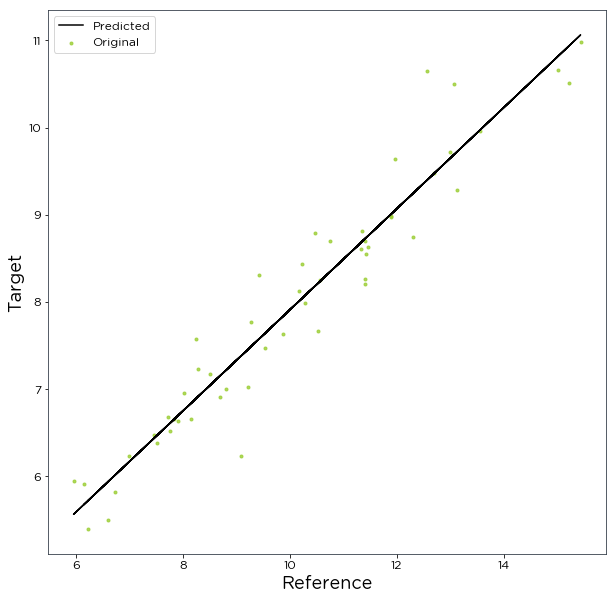

1996-01-01     9.222227
1996-02-01     8.344469
1996-03-01     7.287560
1996-04-01     7.614745
1996-05-01     6.792981
1996-06-01     7.213808
1996-07-01     6.557815
1996-08-01     6.388330
1996-09-01     7.144074
1996-10-01     9.173983
1996-11-01     8.864641
1996-12-01     7.897373
1997-01-01     7.148221
1997-02-01    11.419104
1997-03-01     9.151233
1997-04-01     6.722779
1997-05-01     6.562045
1997-06-01     7.068980
1997-07-01     6.477405
1997-08-01     6.746427
1997-09-01     7.625516
1997-10-01     7.283621
1997-11-01     7.742927
1997-12-01     9.144947
1998-01-01     8.828223
1998-02-01    10.293311
1998-03-01     7.841958
1998-04-01     7.796653
1998-05-01     6.157567
1998-06-01     6.772323
                ...    
2012-12-01     8.699671
2013-01-01     8.746629
2013-02-01     7.986039
2013-03-01     8.704713
2013-04-01     8.790891
2013-05-01     8.306667
2013-06-01     6.471755
2013-07-01     5.398351
2013-08-01     6.909590
2013-09-01     7.475595
2013-10-01     8

In [86]:
ordinary.run()
ordinary.show_params()
ordinary.plot()
ordinary.averaging_prd
ordinary.synthesize()

In [127]:
ordinary

In [87]:
regress = bw.OrthogonalLeastSquares(merra2_dfs[0].data[ref_merra2_wdgt.value], 
                                  site_data[target_wdgt.value], averaging_prd='1D', 
                                  coverage_threshold=0.8)

In [88]:
regress.num_data_pts

1609

Beta: [ 0.64392205  1.47695744]
Beta Std Error: [ 0.00720656  0.07887945]
Beta Covariance: [[  4.64224967e-05  -4.66228154e-04]
 [ -4.66228154e-04   5.56160143e-03]]
Residual Variance: 1.11873668099928
Inverse Condition #: 0.034600071600190484
Reason(s) for Halting:
  Sum of squares convergence
Model output: None
{'slope': 0.64392205317309126, 'offset': 1.4769574429447383, 'r2': 0.81711378887551311}


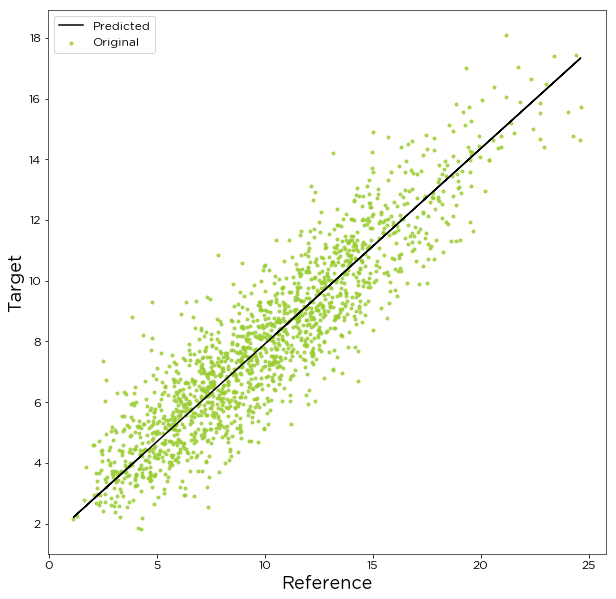

1996-01-01     9.333880
1996-01-02     9.055196
1996-01-03    12.283874
1996-01-04     5.822251
1996-01-05     8.992521
1996-01-06    14.414425
1996-01-07    14.973054
1996-01-08    12.195550
1996-01-09    12.450087
1996-01-10     9.793640
1996-01-11    12.189191
1996-01-12     6.499201
1996-01-13     8.168005
1996-01-14     7.622335
1996-01-15     7.465728
1996-01-16     7.852108
1996-01-17    12.337186
1996-01-18     9.121090
1996-01-19     7.049110
1996-01-20     9.848722
1996-01-21     8.728298
1996-01-22     7.421217
1996-01-23     8.651859
1996-01-24     8.932421
1996-01-25    10.606431
1996-01-26     9.214244
1996-01-27    11.127981
1996-01-28     8.721885
1996-01-29     7.160348
1996-01-30     7.104541
                ...    
2015-05-20     7.633819
2015-05-21     8.998958
2015-05-22     8.083125
2015-05-23     6.037708
2015-05-24     8.020486
2015-05-25     6.013056
2015-05-26     7.278889
2015-05-27     8.191528
2015-05-28     9.129028
2015-05-29     7.594931
2015-05-30     6

In [89]:
regress.run()
regress.show_params()
regress.plot()
regress.synthesize()


In [74]:
merra2_dfs[0].longitude, merra2_dfs[0].latitude

('-8.125', '55.0')

In [9]:
site_data.columns

Index(['TIMESTAMP', 'A_Avg1', 'A_Std1', 'run1_Max', 'A_Min1', 'A_Avg2',
       'A_Std2', 'run2_Max', 'A_Min2', 'A__Avg2_2011', 'A__Std2_2011',
       'Run__Max2_2011', 'A__Min2_2011', 'A_Avg3', 'A_Std3', 'run3_Max',
       'A_Min3', 'A__Avg3_2011', 'A__Std3_2011', 'Run__Max3_2011',
       'A__Min3_2011', 'A_Avg4', 'A_Std4', 'run4_Max', 'A_Min4',
       'A__Avg4_2011', 'A__Std4_2011', 'Run__Max4_2011', 'A__Min4_2011',
       'WindDir_AVG', 'WindDir_SD', 'Dir1_Max', 'Dir1_Min', 'WindDir_2_AVG',
       'WindDir_2_SD', 'Dir2_Max', 'Dir2_Min', 'WindDir_3_AVG', 'WindDir_3_SD',
       'deg_c_Avg', 'Press_mV_Avg'],
      dtype='object')

In [16]:
site_data['A_Avg3']

TIMESTAMP
2011-01-20 09:00:00   NaN
2011-01-20 09:10:00   NaN
2011-01-20 09:20:00   NaN
2011-01-20 09:30:00   NaN
2011-01-20 09:40:00   NaN
2011-01-20 09:50:00   NaN
2011-01-20 10:00:00   NaN
2011-01-20 10:10:00   NaN
2011-01-20 10:20:00   NaN
2011-01-20 10:30:00   NaN
2011-01-20 10:40:00   NaN
2011-01-20 10:50:00   NaN
2011-01-20 11:00:00   NaN
2011-01-20 11:10:00   NaN
2011-01-20 11:20:00   NaN
2011-01-20 11:30:00   NaN
2011-01-20 11:40:00   NaN
2011-01-20 11:50:00   NaN
2011-01-20 12:00:00   NaN
2011-01-20 12:10:00   NaN
2011-01-20 12:20:00   NaN
2011-01-20 12:30:00   NaN
2011-01-20 12:40:00   NaN
2011-01-20 12:50:00   NaN
2011-01-20 13:00:00   NaN
2011-01-20 13:10:00   NaN
2011-01-20 13:20:00   NaN
2011-01-20 13:30:00   NaN
2011-01-20 13:40:00   NaN
2011-01-20 13:50:00   NaN
                       ..
2015-06-18 22:10:00   NaN
2015-06-18 22:20:00   NaN
2015-06-18 22:30:00   NaN
2015-06-18 22:40:00   NaN
2015-06-18 22:50:00   NaN
2015-06-18 23:00:00   NaN
2015-06-18 23:10:00   NaN
20

In [17]:
speed_sort = bw.SpeedSort(site_data['A_Avg1'], site_data['WindDir_2_AVG'], site_data['A_Avg1'],
                          site_data['WindDir_AVG'],'1H', 0)

In [18]:
speed_sort.run()
speed_sort.synthesize()

{'Ref_cutoff_for_speed': 3.9871667934970296, 'Ref_veer_cutoff': 4.970535279988745, 'Target_veer_cutoff': 4.970535279988745, 'Overall_average_veer': -0.02993250513547882}
Processing sector: 1
{'slope': 1.0, 'offset': 0.0}
Processing sector: 2
{'slope': 1.0, 'offset': 0.0}
Processing sector: 3
{'slope': 1.0, 'offset': 0.0}
Processing sector: 4
{'slope': 1.0, 'offset': 0.0}
Processing sector: 5
{'slope': 1.0, 'offset': 0.0}
Processing sector: 6
{'slope': 1.0, 'offset': 0.0}
Processing sector: 7
{'slope': 1.0, 'offset': 0.0}
Processing sector: 8
{'slope': 1.0, 'offset': 0.0}
Processing sector: 9
{'slope': 1.0, 'offset': 0.0}
Processing sector: 10
{'slope': 1.0, 'offset': 0.0}
Processing sector: 11
{'slope': 1.0, 'offset': 0.0}
Processing sector: 12
{'slope': 1.0, 'offset': 0.0}


C:\BW\RTD\repos-hadley\brightwind\brightwind\transform\transform.py:40: UserWarning: Frequency of input data might not be determined correctly (most frequent time difference between adjacent timestamps does not match minimum time difference) most frequent time difference: NaT  minimum time difference nan. Using most frequent time difference as resolution
  .format(pd.to_timedelta(most_freq_time_diff, unit='s'),minimum_time_diff))


,0
2011-01-20 09:00:00,5.368333
2011-01-20 10:00:00,5.158333
2011-01-20 11:00:00,5.115000
2011-01-20 12:00:00,5.998333
2011-01-20 13:00:00,5.250000
2011-01-20 14:00:00,3.505000
2011-01-20 15:00:00,3.178333
2011-01-20 16:00:00,4.206667
2011-01-20 17:00:00,4.980000
2011-01-20 18:00:00,4.128333


In [134]:
speed_sort.show_params()

{'Ref_cutoff_for_speed': 4.0, 'Ref_veer_cutoff': 5.436711715091463, 'Target_veer_cutoff': 4.985375669452294, 'Overall_average_veer': 0.5364231228082861, 1: {'slope': 0.68419065380463762, 'offset': 2.5158060925238086, 'target_cutoff': 4.9800000000000004, 'num_pts_for_speed_fit': 1696, 'num_total_pts': 2066, 'average_veer': -10.653874538745388, 'num_pts_for_veer': 1355}, 2: {'slope': 0.72237032185132877, 'offset': 1.6939461840285421, 'target_cutoff': 4.0999999999999996, 'num_pts_for_speed_fit': 1431, 'num_total_pts': 1885, 'average_veer': -8.308021390374332, 'num_pts_for_veer': 935}, 3: {'slope': 0.79275718102501269, 'offset': 0.72310581091157111, 'target_cutoff': 3.6200000000000001, 'num_pts_for_speed_fit': 887, 'num_total_pts': 1216, 'average_veer': -1.4563106796116505, 'num_pts_for_veer': 515}, 4: {'slope': 0.85675487389886895, 'offset': 0.22882347335777986, 'target_cutoff': 3.9100000000000001, 'num_pts_for_speed_fit': 1239, 'num_total_pts': 1554, 'average_veer': 3.8545258620689653, '

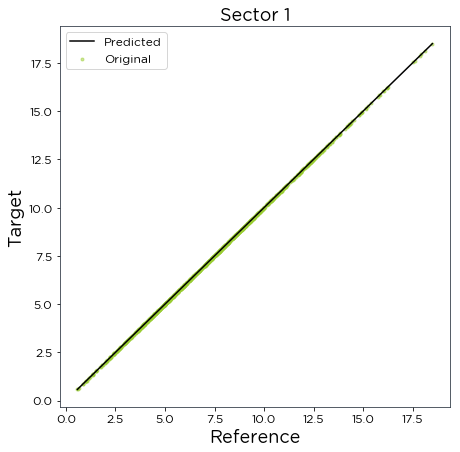

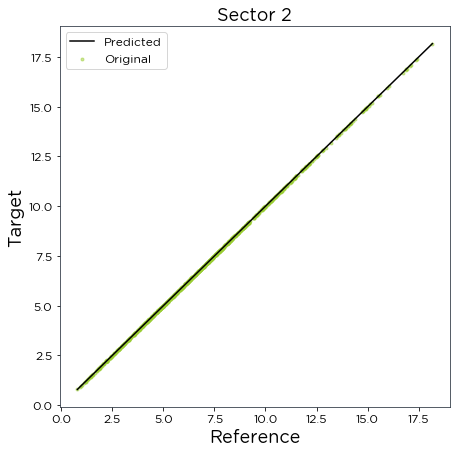

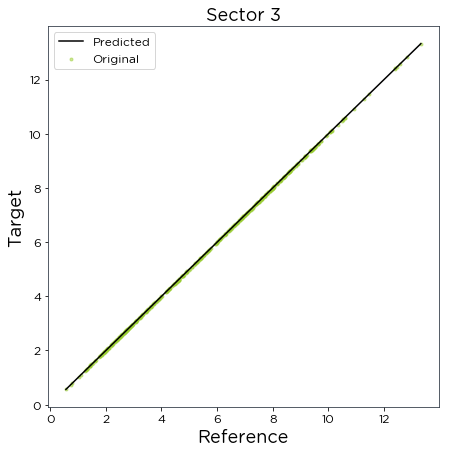

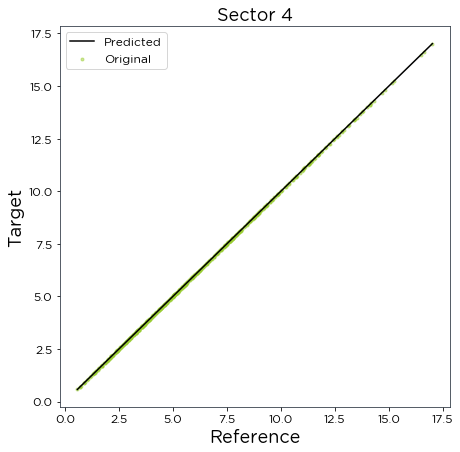

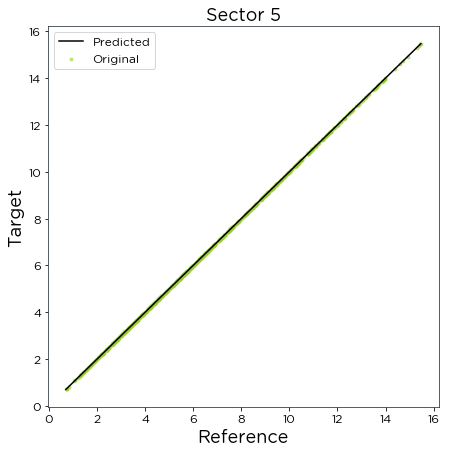

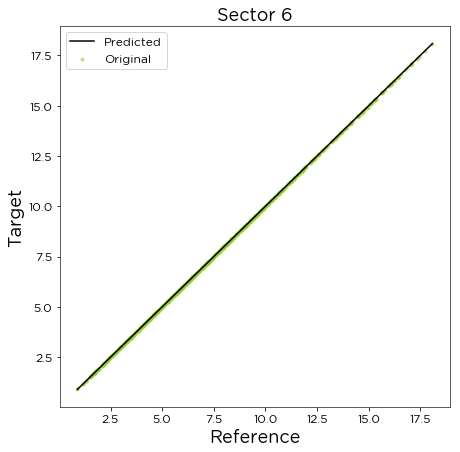

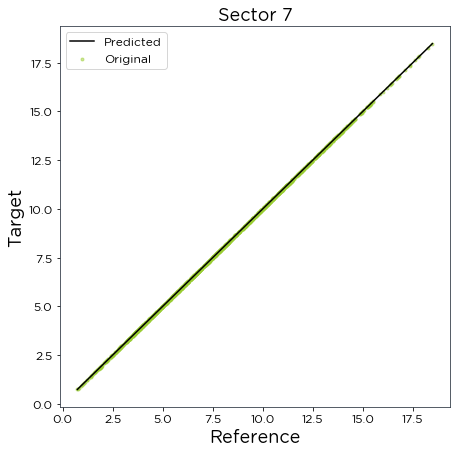

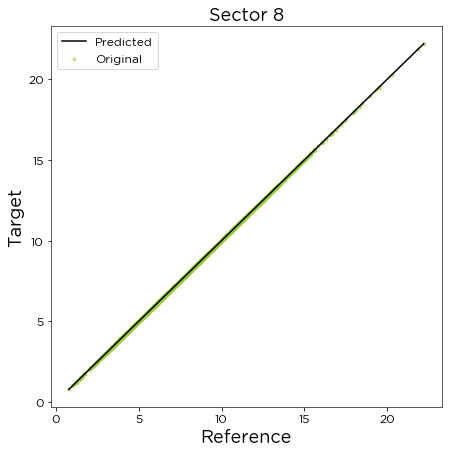

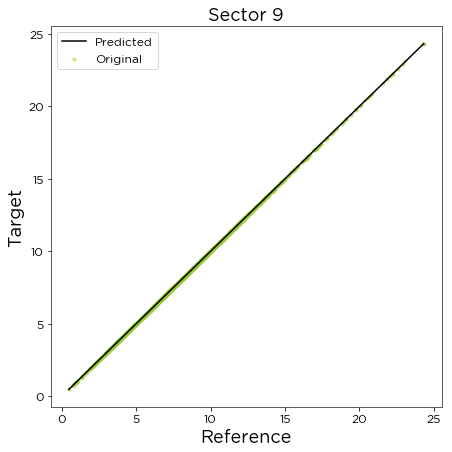

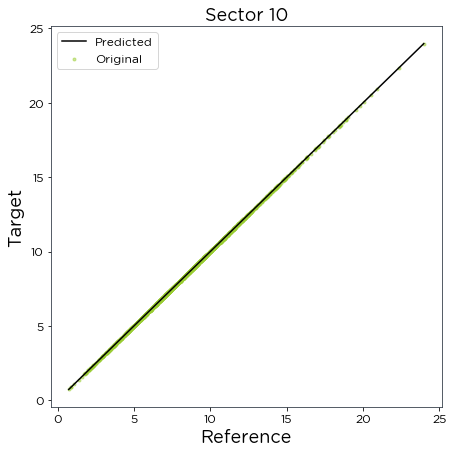

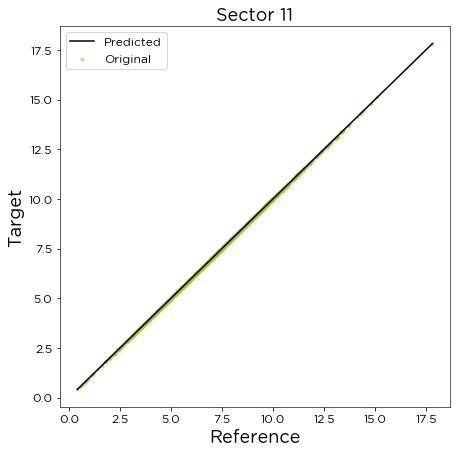

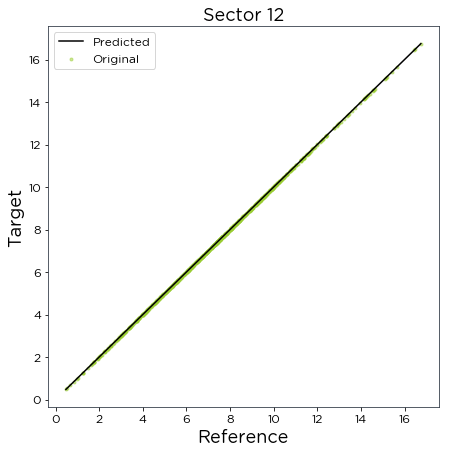

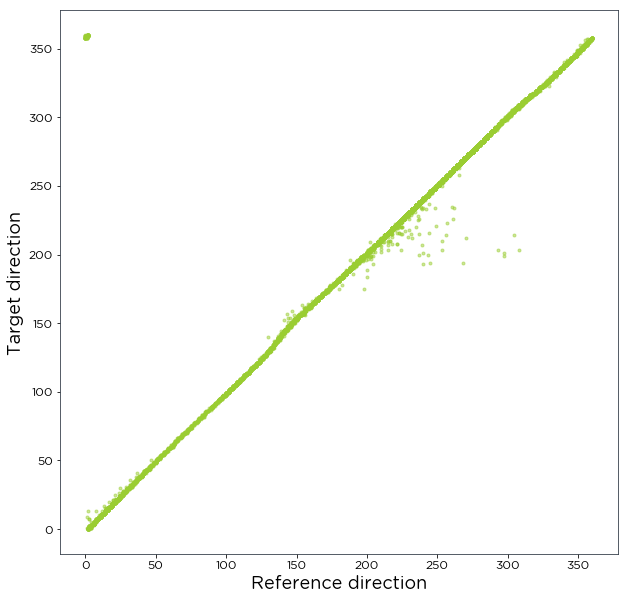

In [19]:
speed_sort.plot()

In [136]:
speed_sort.get_result_table()


,average_veer,num_pts_for_speed_fit,num_pts_for_veer,num_total_pts,offset,slope,target_cutoff
1,-10.653875,1696,1355,2066,2.515806,0.684191,4.98
2,-8.308021,1431,935,1885,1.693946,0.722370,4.10
3,-1.456311,887,515,1216,0.723106,0.792757,3.62
4,3.854526,1239,928,1554,0.228823,0.856755,3.91
5,1.616897,2277,1882,2550,0.475909,0.781412,3.66
6,8.751712,2853,2191,3186,-0.914085,0.913712,3.49
7,10.866314,3317,2648,3655,-0.841482,0.892089,3.27
8,4.705607,4641,3638,5023,-0.979818,0.819412,3.00
9,0.939578,5504,4601,5859,-0.152901,0.771538,3.23
10,-3.182193,5266,4605,5644,0.694512,0.728323,3.76


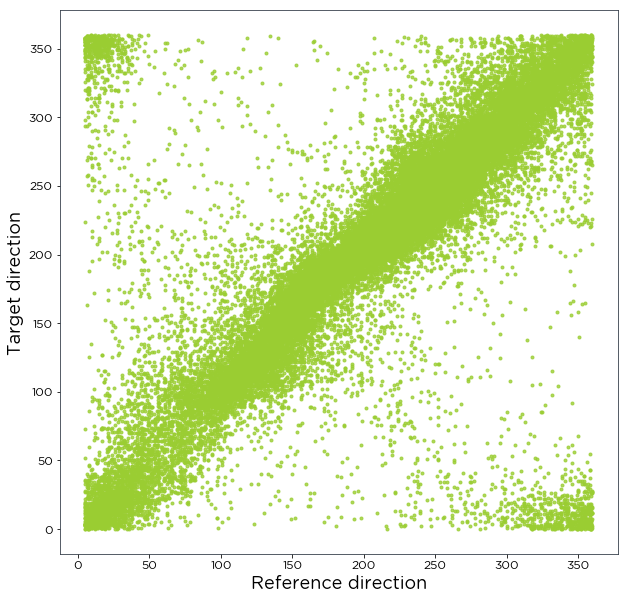

In [137]:
speed_sort.plot_wind_vane()

In [22]:
speed_sort.overall_veer

0.5364231228082861

In [191]:
result['average_veer'].mean()

1.0249810615590242

In [192]:
sum(result['num_total_pts'])

38653

In [193]:
sum(result['num_pts_for_speed_fit'])

34076

In [194]:
sum(result['num_pts_for_veer'])

28135

In [119]:
bulkratio = bw.BulkSpeedRatio(merra2_dfs[0].data[ref_merra2_wdgt.value], 
                                  site_data[target_wdgt.value],'1H', 0.9)

In [120]:
bulkratio.run()

In [121]:
bulkratio.params

{'slope': 0.7907753382335793}

In [99]:
analyse.mean_of_monthly_means(merra2_dfs[0].data[ref_merra2_wdgt.value])*bulkratio.params['slope']

,MOMM
0,7.897642


In [100]:
bulkratio.synthesize()

1996-01-01 00:00:00    11.885353
1996-01-01 01:00:00    11.633096
1996-01-01 02:00:00    11.280410
1996-01-01 03:00:00    10.950657
1996-01-01 04:00:00    10.900047
1996-01-01 05:00:00    10.763243
1996-01-01 06:00:00    10.517312
1996-01-01 07:00:00    10.188349
1996-01-01 08:00:00     9.927394
1996-01-01 09:00:00     9.594477
1996-01-01 10:00:00     9.323241
1996-01-01 11:00:00     9.250490
1996-01-01 12:00:00     9.176948
1996-01-01 13:00:00     9.174575
1996-01-01 14:00:00     9.223604
1996-01-01 15:00:00     9.215696
1996-01-01 16:00:00     9.202253
1996-01-01 17:00:00     9.080473
1996-01-01 18:00:00     8.978463
1996-01-01 19:00:00     8.881989
1996-01-01 20:00:00     8.647919
1996-01-01 21:00:00     8.246205
1996-01-01 22:00:00     7.891938
1996-01-01 23:00:00     7.636517
1996-01-02 00:00:00     7.355001
1996-01-02 01:00:00     7.055298
1996-01-02 02:00:00     6.919284
1996-01-02 03:00:00     7.187357
1996-01-02 04:00:00     7.516320
1996-01-02 05:00:00     7.801789
          

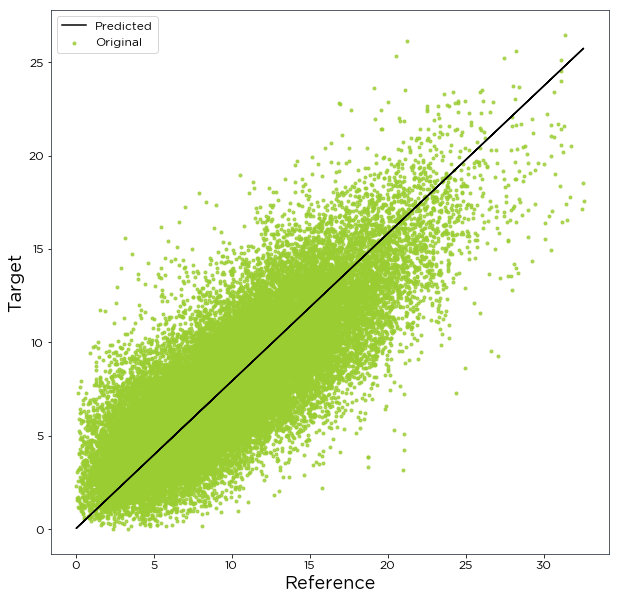

In [101]:
bulkratio.plot()

### Testing Direction Binning by Ciaran's tool

In [245]:
from analyse import frequency_analysis as freq
dir_test = pd.read_csv('direction_test.csv')
dir_test['bw_tool'] = freq.get_binned_direction_series(dir_test['Direction'], sectors=12) - 1.0
dir_test ['difference'] = abs(dir_test['bw_tool']  - dir_test["Ciaran's"])
dir_test.to_csv('direction_test.csv')

### Testing averaging by Ciaran's tool

In [252]:
speed_sort.data.to_csv('averaging_check.csv')

In [253]:
speed_sort.data.head(5)

,ref_spd,target_spd,ref_dir,target_dir,ref_dir_bin
2011-01-20 09:00:00,4.386,5.368333,205.0,221.520378,8
2011-01-20 10:00:00,4.276,5.158333,207.0,212.812301,8
2011-01-20 11:00:00,4.297,5.115000,206.0,218.325316,8
2011-01-20 12:00:00,4.424,5.998333,205.0,220.561748,8
2011-01-20 13:00:00,4.550,5.250000,206.0,232.589117,8


In [256]:
avg_test = pd.read_csv('averaging_check.csv')
avg_test = avg_test.set_index(pd.DatetimeIndex(avg_test['Timestamp']))
avg_test = pd.concat([avg_test,speed_sort.data], axis=1, join='inner')
avg_test['ref_spd_diff'] = abs(avg_test['ref_spd'] - avg_test['ref_spd_C'])
avg_test['target_spd_diff'] = abs(avg_test['target_spd'] - avg_test['target_spd_C'])
avg_test['ref_dir_diff'] = abs(avg_test['ref_dir'] - avg_test['ref_dir_C'])
avg_test['target_dir_diff'] = abs(avg_test['target_dir'] - avg_test['target_dir_C'])
avg_test.head(10)


,Timestamp,target_spd_C,target_dir_C,ref_spd_C,ref_dir_C,ref_spd,target_spd,ref_dir,target_dir,ref_dir_bin,ref_spd_diff,target_spd_diff,ref_dir_diff,target_dir_diff
2011-01-20 09:00:00,1/20/2011 09:00,5.368333,221.520371,4.386,205,4.386,5.368333,205.0,221.520378,8,1.560000e-07,6.666668e-09,2.842171e-14,7.602772e-06
2011-01-20 10:00:00,1/20/2011 10:00,5.158333,212.812302,4.276,207,4.276,5.158333,207.0,212.812301,8,2.300000e-08,3.133333e-08,5.684342e-14,5.447800e-07
2011-01-20 11:00:00,1/20/2011 11:00,5.115000,218.325317,4.297,206,4.297,5.115000,206.0,218.325316,8,6.900000e-08,2.290000e-07,2.842171e-14,1.786469e-06
2011-01-20 12:00:00,1/20/2011 12:00,5.998333,220.561752,4.424,205,4.424,5.998333,205.0,220.561748,8,2.140000e-07,1.206667e-07,0.000000e+00,4.438059e-06
2011-01-20 13:00:00,1/20/2011 13:00,5.250000,232.589111,4.550,206,4.550,5.250000,206.0,232.589117,8,1.910000e-07,0.000000e+00,2.842171e-14,5.797391e-06
2011-01-20 14:00:00,1/20/2011 14:00,3.505000,233.952560,4.537,209,4.537,3.505000,209.0,233.952562,8,1.790000e-07,1.140000e-07,0.000000e+00,1.417876e-06
2011-01-20 15:00:00,1/20/2011 15:00,3.178333,232.907303,4.416,213,4.416,3.178333,213.0,232.907300,8,1.110000e-07,5.133333e-08,0.000000e+00,3.231382e-06
2011-01-20 16:00:00,1/20/2011 16:00,4.206666,244.597748,4.358,216,4.358,4.206667,216.0,244.597741,8,1.980000e-07,1.966667e-07,0.000000e+00,7.023625e-06
2011-01-20 17:00:00,1/20/2011 17:00,4.980000,238.875351,4.439,217,4.439,4.980000,217.0,238.875353,8,1.300000e-07,1.900000e-08,0.000000e+00,1.883546e-06
2011-01-20 18:00:00,1/20/2011 18:00,4.128334,253.291061,4.492,217,4.492,4.128333,217.0,253.291055,8,1.030000e-07,2.356667e-07,0.000000e+00,6.372372e-06


In [261]:
avg_test.to_csv('averaging_test_results.csv')

In [263]:
avg_test[avg_test['ref_dir_bin']>0]

,Timestamp,target_spd_C,target_dir_C,ref_spd_C,ref_dir_C,ref_spd,target_spd,ref_dir,target_dir,ref_dir_bin,ref_spd_diff,target_spd_diff,ref_dir_diff,target_dir_diff
2011-01-21 19:00:00,1/21/2011 19:00,5.591667,359.371643,1.240,298,1.240,5.591667,359.371646,359.371646,1,1.000000e-08,3.133333e-08,61.371646,2.754636e-06
2011-01-22 00:00:00,1/22/2011,6.281667,19.265867,1.238,303,1.238,6.281667,19.265868,19.265868,2,3.500000e-08,8.933333e-08,283.734132,8.440202e-07
2011-01-22 01:00:00,1/22/2011 01:00,7.693333,16.968378,1.156,323,1.156,7.693333,16.968379,16.968379,2,1.800000e-08,1.843333e-07,306.031621,4.579017e-07
2011-01-22 02:00:00,1/22/2011 02:00,7.733333,14.157602,1.181,347,1.181,7.733333,14.157603,14.157603,1,6.000000e-09,2.223333e-07,332.842397,4.216543e-07
2011-01-22 03:00:00,1/22/2011 03:00,7.726666,12.857865,1.320,7,1.320,7.726667,12.857865,12.857865,1,5.200000e-08,2.156667e-07,5.857865,1.289103e-07
2011-01-22 04:00:00,1/22/2011 04:00,7.598333,17.429571,1.446,17,1.446,7.598333,17.429571,17.429571,2,2.000000e-08,2.566667e-08,0.429571,4.950137e-07
2011-01-22 05:00:00,1/22/2011 05:00,6.801667,25.819942,1.464,18,1.464,6.801667,25.819943,25.819943,2,1.300000e-08,7.033333e-08,7.819943,7.846084e-07
2011-01-22 06:00:00,1/22/2011 06:00,7.570000,20.417307,1.402,14,1.402,7.570000,20.417308,20.417308,2,5.000000e-08,1.720000e-07,6.417308,7.469265e-07
2011-01-22 07:00:00,1/22/2011 07:00,7.678333,17.365040,1.336,9,1.336,7.678333,17.365040,17.365040,2,3.400000e-08,5.133333e-08,8.365040,2.234193e-07
2011-01-22 08:00:00,1/22/2011 08:00,7.535000,19.518656,1.274,7,1.274,7.535000,19.518656,19.518656,2,4.900000e-08,1.530000e-07,12.518656,1.789803e-07


In [22]:
class test_base:
    def check(a):
        print(a)
    def test():
        print("I am in base class")
class test_child(test_base):
    def print_t(self):
        print('i am printing')
    def test(self):
        print("I am in child class")
        self.print_t();
obj = test_child()
obj.test()

I am in child class
i am printing


In [173]:
for i in speed_sort.data.groupby(['ref_dir_bin']):
    data = pd.read_csv('sector'+str(i[0])+'_test.csv',index_col=False)
    result = pd.concat([i[1].reset_index(),data],axis=1)
    result.to_csv('sector'+str(i[0])+'_test_compare.csv')

In [200]:
transform.get_coverage(site_data['A_Avg1'], '1M')

,A_Avg1,Count,Coverage
TIMESTAMP,,,
2011-01-01,6.271714,1674,0.375000
2011-02-01,8.261815,4032,1.000000
2011-03-01,6.237083,4464,1.000000
2011-04-01,7.001463,4320,1.000000
2011-05-01,10.643631,4464,1.000000
2011-06-01,6.381873,4320,1.000000
2011-07-01,5.910354,4464,1.000000
2011-08-01,5.820753,4464,1.000000
2011-09-01,9.641574,4320,1.000000


In [258]:
test1, test2=bw._preprocess_dir_data_for_correlations(ref['WS50m_ms'], ref['WD50m_deg'], site_data['A_Avg1'],
                          site_data['WindDir_AVG'],'5H', 0)
test1

                         E  Count
DateTime                         
2011-01-20 00:00:00  197.0      5
2011-01-20 05:00:00  204.0      5
2011-01-20 10:00:00  207.0      5
2011-01-20 15:00:00  216.0      5
2011-01-20 20:00:00  221.0      5
2011-01-21 01:00:00  224.0      5
2011-01-21 06:00:00  223.0      5
2011-01-21 11:00:00  234.0      5
2011-01-21 16:00:00  281.0      5
2011-01-21 21:00:00  302.0      5
2011-01-22 02:00:00   10.0      5
2011-01-22 07:00:00    5.0      5
2011-01-22 12:00:00    9.0      5
2011-01-22 17:00:00   23.0      5
2011-01-22 22:00:00   18.0      5
2011-01-23 03:00:00   21.0      5
2011-01-23 08:00:00   22.0      5
2011-01-23 13:00:00  346.0      5
2011-01-23 18:00:00  338.0      5
2011-01-23 23:00:00  303.0      5
2011-01-24 04:00:00  297.0      5
2011-01-24 09:00:00  294.0      5
2011-01-24 14:00:00  300.0      5
2011-01-24 19:00:00  304.0      5
2011-01-25 00:00:00  300.0      5
2011-01-25 05:00:00  311.0      5
2011-01-25 10:00:00  329.0      5
2011-01-25 15:

,E
2011-01-20 05:00:00,204.0
2011-01-20 10:00:00,207.0
2011-01-20 15:00:00,216.0
2011-01-20 20:00:00,221.0
2011-01-21 01:00:00,224.0
2011-01-21 06:00:00,223.0
2011-01-21 11:00:00,234.0
2011-01-21 16:00:00,281.0
2011-01-21 21:00:00,302.0
2011-01-22 02:00:00,10.0


In [233]:
bw._preprocess_data_for_correlations(ref.loc['2006':,'WS50m_ms'], ref.loc['2006':,'WS50m_ms'],'6M',0)

,WS50m_ms,Count,Coverage
DateTime,,,
2006-01-01,8.521690,4344,1.0
2006-07-01,9.020437,4416,1.0
2007-01-01,8.980777,4344,1.0
2007-07-01,8.521915,4416,1.0
2008-01-01,9.322370,4368,1.0
2008-07-01,8.654504,4416,1.0
2009-01-01,8.843457,4344,1.0
2009-07-01,8.675714,4416,1.0
2010-01-01,7.109253,4344,1.0


In [239]:
pd.concat([ref['WD50m_deg'],transform.offset_wind_direction(ref['WD50m_deg'],-122)],axis=1)

,WD50m_deg,WD50m_deg
DateTime,,
1996-01-01 00:00:00,121.0,359.0
1996-01-01 01:00:00,122.0,0.0
1996-01-01 02:00:00,123.0,1.0
1996-01-01 03:00:00,124.0,2.0
1996-01-01 04:00:00,125.0,3.0
1996-01-01 05:00:00,134.0,12.0
1996-01-01 06:00:00,140.0,18.0
1996-01-01 07:00:00,146.0,24.0
1996-01-01 08:00:00,152.0,30.0
